# Text Mining Amazon Mobile Case Review

### 1) Extract reviews of any product from ecommerce website like amazon.  2) Perform emotion mining

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
import string 
import spacy

In [3]:
book = pd.read_csv("C:\\Users\\User\\Documents\\Datascience_Assignments\\Assignment 11 (Text Mining)\\Amazon - moile case reviews.txt", error_bad_lines=False)

In [4]:
book

,x
0,This is a best case I have ever purchased. Whe...
1,This is an awesome armour protection for samsu...
2,Amazing and durable product. Looking stylish 😎...
3,Wow amazing case. When I attached the case it ...
4,Cut 2 cut fix ... amazing to buy. Happy for th...
5,Exceptional quality and majestic.This black an...
6,I got the product delivered today (1st Jan 202...
7,Just got the cover and looks pretty awesome an...
8,This is an excellent back cover for mobile. It...
9,"This is an exact fit for Samsung M51, the cuts..."


In [5]:
book = [x.strip() for x in book.x] 
book = [x for x in book if x] 
book[0:10]

["This is a best case I have ever purchased. When Galaxy M51 launched there were only less mobile cases put there and I didn't want to go with high end cases which were looking classy but not upto to the mark.This case from GiftKart didn't had any reviews though, so I bought it with a doubt.. and I was not disappointed and amazed by the packing and a motivational message in the pack with Steve Jobs picture.",
 "This is an awesome armour protection for samsung M51. The laser cutting is so precise it looks and feels premium. You can use mobile without any drop worries. Also the stand at the back is helpful to be used as mobile stand and alternatively can also be used as ring holder. The magnetic holder works perfectly. Overall this cover is the best buy with these many added advantages at an affordable price. Bought it for ₹250. Don't think just blindly go for it. You won't regret.",
 'Amazing and durable product. Looking stylish 😎 better than others and value for the price. Go for its b

In [6]:
text = ' '.join(book)
text

"This is a best case I have ever purchased. When Galaxy M51 launched there were only less mobile cases put there and I didn't want to go with high end cases which were looking classy but not upto to the mark.This case from GiftKart didn't had any reviews though, so I bought it with a doubt.. and I was not disappointed and amazed by the packing and a motivational message in the pack with Steve Jobs picture. This is an awesome armour protection for samsung M51. The laser cutting is so precise it looks and feels premium. You can use mobile without any drop worries. Also the stand at the back is helpful to be used as mobile stand and alternatively can also be used as ring holder. The magnetic holder works perfectly. Overall this cover is the best buy with these many added advantages at an affordable price. Bought it for ₹250. Don't think just blindly go for it. You won't regret. Amazing and durable product. Looking stylish 😎 better than others and value for the price. Go for its beautiful 

In [7]:
no_punc_text = text.translate(str.maketrans('', '', string.punctuation)) 
no_punc_text

'This is a best case I have ever purchased When Galaxy M51 launched there were only less mobile cases put there and I didnt want to go with high end cases which were looking classy but not upto to the markThis case from GiftKart didnt had any reviews though so I bought it with a doubt and I was not disappointed and amazed by the packing and a motivational message in the pack with Steve Jobs picture This is an awesome armour protection for samsung M51 The laser cutting is so precise it looks and feels premium You can use mobile without any drop worries Also the stand at the back is helpful to be used as mobile stand and alternatively can also be used as ring holder The magnetic holder works perfectly Overall this cover is the best buy with these many added advantages at an affordable price Bought it for ₹250 Dont think just blindly go for it You wont regret Amazing and durable product Looking stylish 😎 better than others and value for the price Go for its beautiful product Wow amazing c

In [8]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(no_punc_text)
print(text_tokens[0:50])

['This', 'is', 'a', 'best', 'case', 'I', 'have', 'ever', 'purchased', 'When', 'Galaxy', 'M51', 'launched', 'there', 'were', 'only', 'less', 'mobile', 'cases', 'put', 'there', 'and', 'I', 'didnt', 'want', 'to', 'go', 'with', 'high', 'end', 'cases', 'which', 'were', 'looking', 'classy', 'but', 'not', 'upto', 'to', 'the', 'markThis', 'case', 'from', 'GiftKart', 'didnt', 'had', 'any', 'reviews', 'though', 'so']


In [9]:
len(text_tokens)

2266

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['This', 'best', 'case', 'I', 'ever', 'purchased', 'When', 'Galaxy', 'M51', 'launched', 'less', 'mobile', 'cases', 'put', 'I', 'didnt', 'want', 'go', 'high', 'end', 'cases', 'looking', 'classy', 'upto', 'markThis', 'case', 'GiftKart', 'didnt', 'reviews', 'though', 'I', 'bought', 'doubt', 'I', 'disappointed', 'amazed', 'packing', 'motivational', 'message', 'pack']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['this', 'best', 'case', 'i', 'ever', 'purchased', 'when', 'galaxy', 'm51', 'launched', 'less', 'mobile', 'cases', 'put', 'i', 'didnt', 'want', 'go', 'high', 'end', 'cases', 'looking', 'classy', 'upto', 'markthis']


In [12]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['thi', 'best', 'case', 'i', 'ever', 'purchas', 'when', 'galaxi', 'm51', 'launch', 'less', 'mobil', 'case', 'put', 'i', 'didnt', 'want', 'go', 'high', 'end', 'case', 'look', 'classi', 'upto', 'markthi', 'case', 'giftkart', 'didnt', 'review', 'though', 'i', 'bought', 'doubt', 'i', 'disappoint', 'amaz', 'pack', 'motiv', 'messag', 'pack']


In [14]:
nlp = spacy.load('en_core_web_sm') 

In [15]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

This best case I ever purchased When Galaxy M51 launched less mobile cases put I didnt want go high end cases looking classy upto markThis case GiftKart didnt reviews though I bought doubt I disappointed amazed packing motivational


In [16]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['this', 'good', 'case', 'I', 'ever', 'purchase', 'when', 'Galaxy', 'M51', 'launch', 'less', 'mobile', 'case', 'put', 'I', 'do', 'nt', 'want', 'go', 'high', 'end', 'case', 'look', 'classy', 'upto']


#### Feature Extraction

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(lemmas)

In [18]:
print(vectorizer.vocabulary_)

{'this': 454, 'good': 203, 'case': 91, 'ever': 166, 'purchase': 355, 'when': 498, 'galaxy': 195, 'm51': 277, 'launch': 263, 'less': 264, 'mobile': 296, 'put': 356, 'do': 151, 'nt': 312, 'want': 489, 'go': 202, 'high': 223, 'end': 161, 'look': 272, 'classy': 98, 'upto': 473, 'markthis': 284, 'giftkart': 199, 'review': 372, 'though': 455, 'buy': 86, 'doubt': 152, 'disappoint': 148, 'amazed': 38, 'packing': 323, 'motivational': 300, 'message': 291, 'pack': 321, 'steve': 423, 'jobs': 256, 'picture': 334, 'awesome': 59, 'armour': 49, 'protection': 352, 'samsung': 382, 'the': 447, 'laser': 261, 'cut': 129, 'precise': 340, 'feel': 180, 'premium': 342, 'you': 515, 'use': 476, 'without': 504, 'drop': 155, 'worry': 508, 'also': 34, 'stand': 421, 'back': 60, 'helpful': 221, 'alternatively': 35, 'ring': 374, 'holder': 226, 'magnetic': 279, 'work': 507, 'perfectly': 331, 'overall': 320, 'cover': 124, 'many': 283, 'add': 25, 'advantage': 26, 'affordable': 28, 'price': 345, 'bought': 77, '250': 8, 't

In [19]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['armoured', 'around', 'as', 'asthetic', 'at', 'attach', 'attachment', 'attractive', 'away', 'awesome', 'back', 'bad', 'battery', 'be', 'beast', 'beautiful', 'beautythe', 'become', 'bed', 'bedelse', 'behind', 'bet', 'big', 'bit', 'black', 'blindly', 'border', 'bought', 'brand', 'bring', 'buck', 'build', 'bulk', 'bulky', 'but', 'button', 'buy', 'ca', 'camera', 'car', 'care', 'case', 'cause', 'charge', 'cheap', 'check', 'cheers', 'chunky', 'classy', 'clean']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [20]:
print(X.toarray().shape)

(1404, 516)


#### Let's see how can bigrams and trigrams can be included here

In [21]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(book)

In [22]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['after', 'all', 'also', 'amazing', 'amazon', 'an', 'and', 'any', 'are', 'as', 'at', 'at the', 'awesome', 'back', 'back cover', 'best', 'but', 'buy', 'can', 'case', 'cover', 'doesn', 'excellent', 'feel', 'feels', 'fit', 'fits', 'for', 'for it', 'for money', 'from', 'go', 'go for', 'go for it', 'good', 'great', 'have', 'in', 'in the', 'is', 'is good', 'it', 'it is', 'its', 'just', 'like', 'looking', 'looks', 'm51', 'magnet', 'mobile', 'money', 'more', 'my', 'not', 'of', 'of the', 'on', 'one', 'only', 'perfect', 'perfectly', 'phone', 'price', 'product', 'protection', 'quality', 'really', 'ring', 'so', 'stand', 'sturdy', 'that', 'the', 'the back', 'the case', 'the cover', 'the phone', 'the product', 'there', 'this', 'this is', 'this product', 'time', 'to', 'too', 'used', 'using', 'value', 'value for', 'value for money', 'very', 'very good', 'was', 'well', 'which', 'will', 'with', 'you', 'your']
[[0 0 0 ... 3 0 0]
 [0 0 2 ... 1 2 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 

#### TFidf vectorizer

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(book)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['250', '300', '300 rs', '400', 'able', 'about', 'absolutely', 'affordable', 'affordable price', 'after', 'after using', 'all', 'all are', 'already', 'also', 'also the', 'although', 'although it', 'am', 'am not', 'amazing', 'amazon', 'an', 'an awesome', 'an awesome armour', 'and', 'and also', 'and durable', 'and feels', 'and good', 'and good looking', 'and is', 'and it', 'and looks', 'and sturdy', 'and the', 'and this', 'any', 'anyway', 'are', 'are perfect', 'armour', 'armour protection', 'armour protection for', 'as', 'as expected', 'as mobile', 'as mobile stand', 'at', 'at the', 'at the back', 'at this', 'at this price', 'attached', 'attractive', 'awesome', 'awesome and', 'awesome armour', 'awesome armour protection', 'back', 'back cover', 'back cover for', 'back is', 'be', 'be used', 'be used as', 'beautiful', 'because', 'been', 'behind', 'best', 'best case', 'better', 'better than', 'big', 'bit', 'bought', 'bought it', 'built', 'bulky', 'but', 'but not', 'but once', 'buy', 'buy it'

####  Generate wordcloud

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");

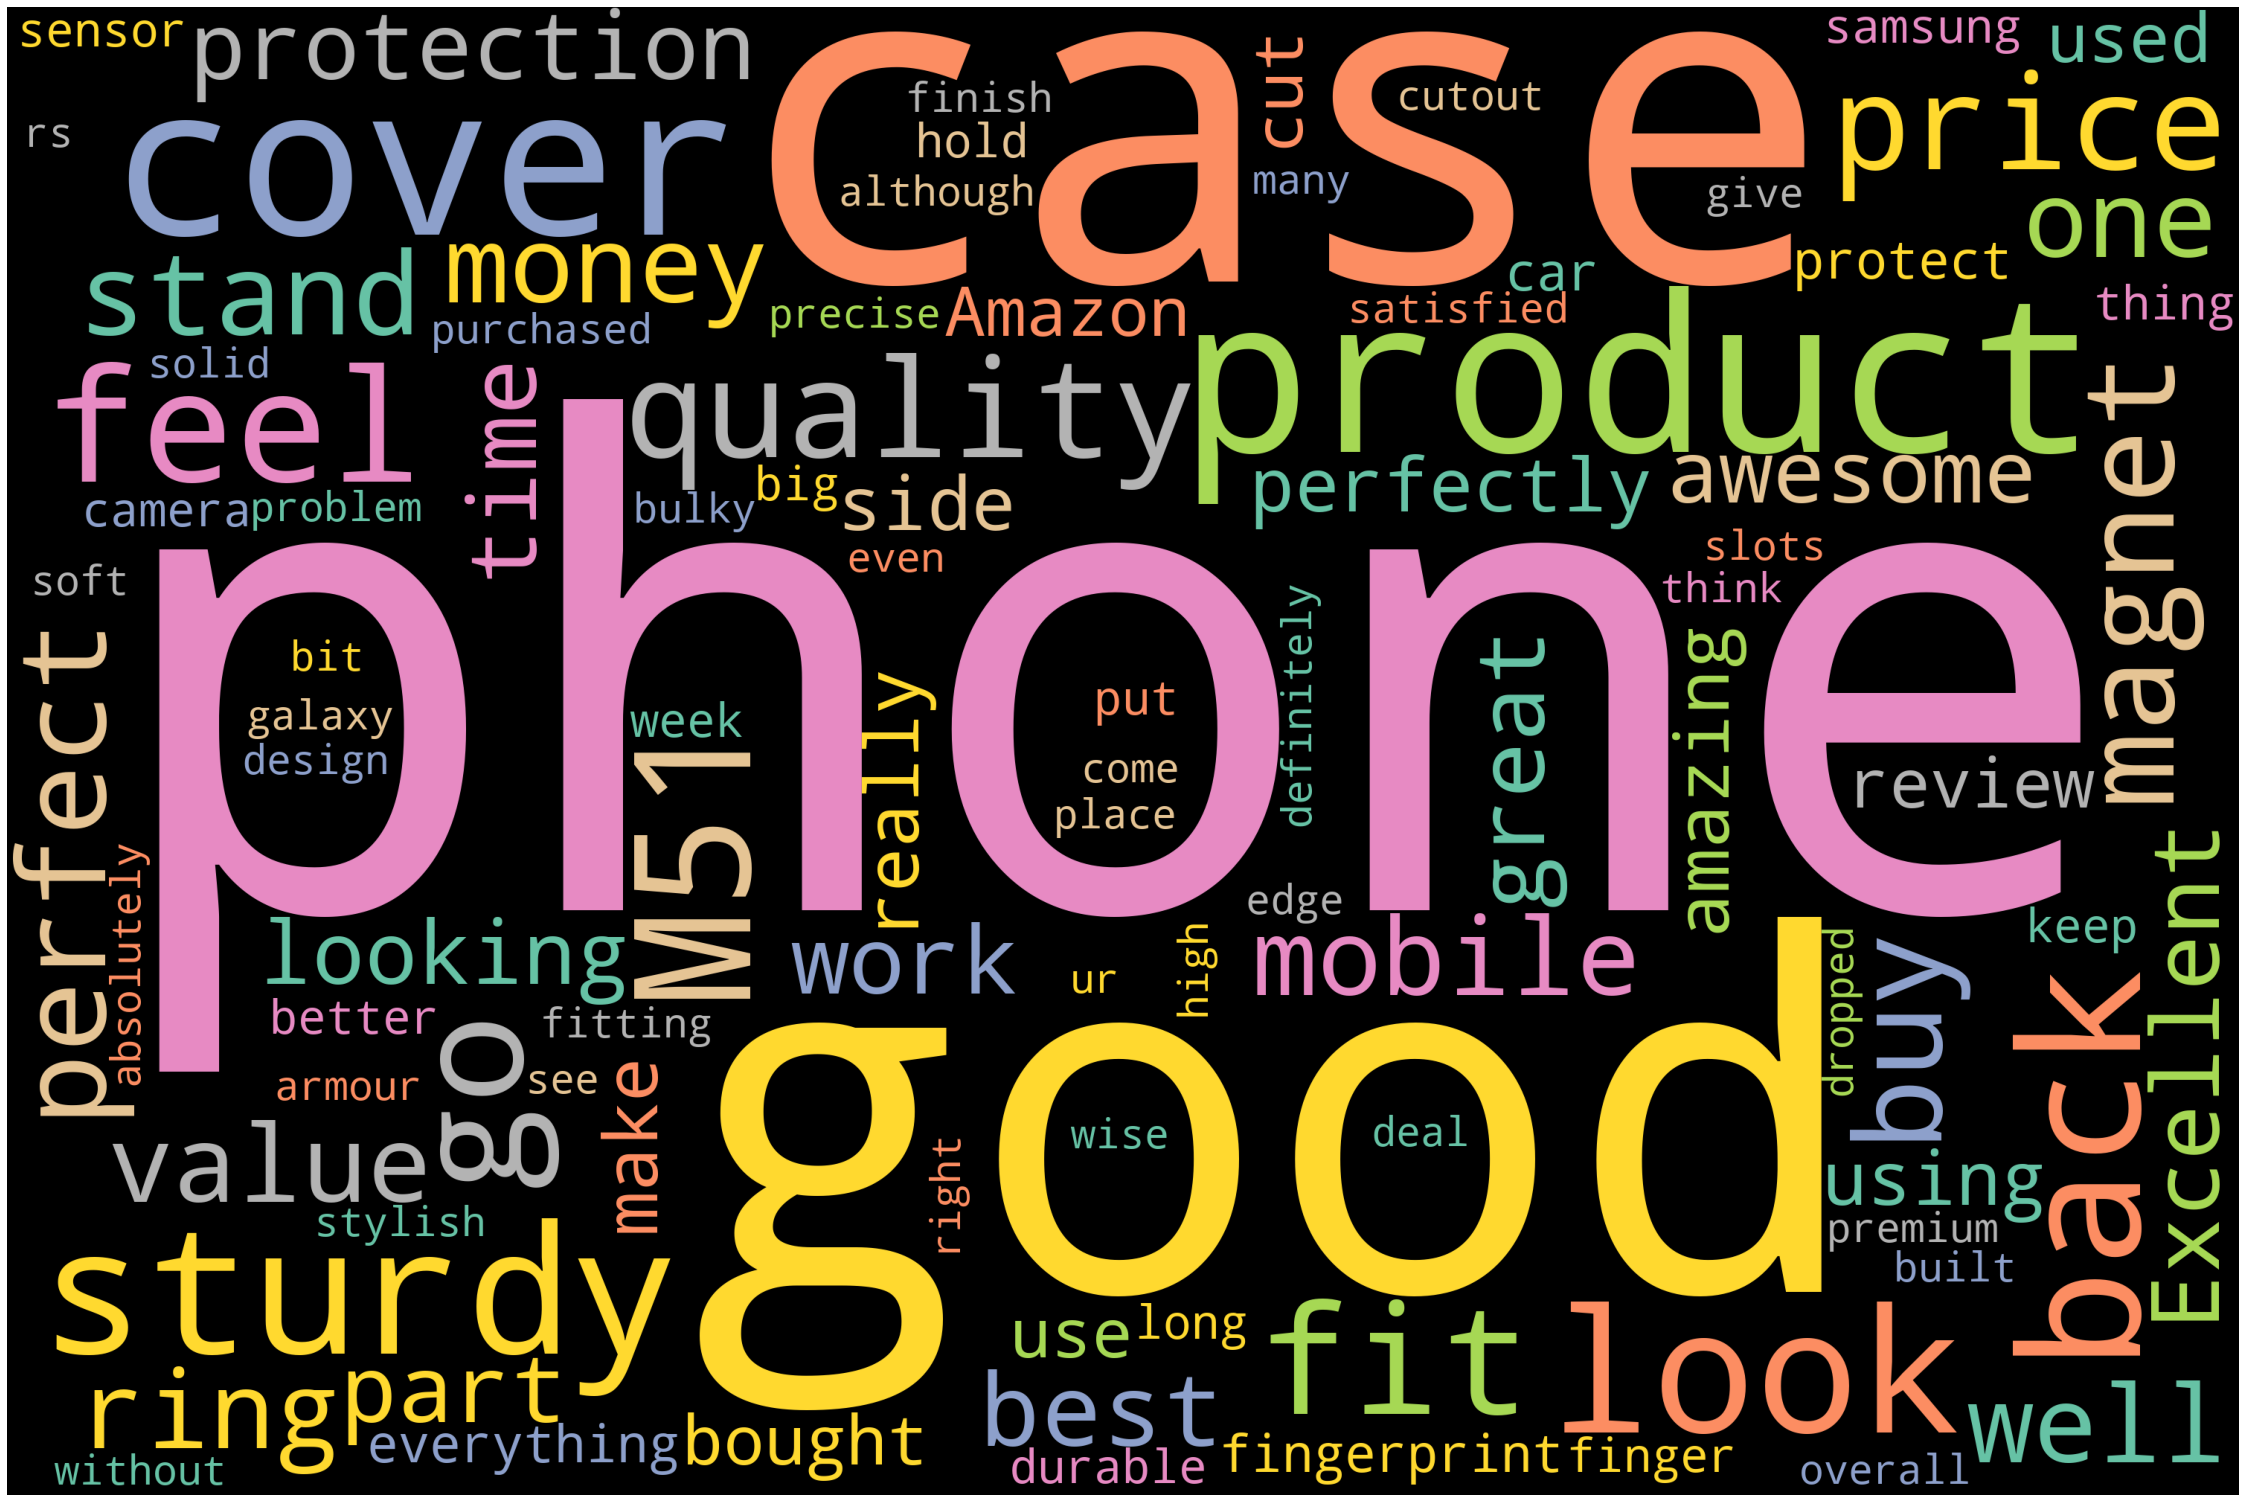

In [25]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
plot_cloud(wordcloud)